In [1]:
%matplotlib inline

import csv
import numpy as np
import sklearn as sk
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn import tree
import os
import sys
import graphviz
import matplotlib.pyplot as plt

sys.path.append('C:\\Program Files (x86)\\Graphviz2.38\\bin')
os.environ['PATH'] += ';' + 'C:\\Program Files (x86)\\Graphviz2.38\\bin'

X = []
y = []

with open('snapshots_Xy_180709_124937.csv', 'rb') as f:
    rdr = csv.reader(f, delimiter=',')
    next(rdr)
    # dat = [r for r in rdr]
    for row in rdr:
        X.append([float(x) for x in row[2:-1]])
        y.append(int(row[1]))

X = np.asarray(X)
y = np.asarray(y)

Xtrain = X[0:3000,:]
Xtest = X[3000:,:]
ytrain = y[0:3000]
ytest = y[3000:]

In [2]:
def get_accuracy(ytrue, ypred):
    v = [e == ypred[i] for i, e in enumerate(ytrue)]
    return float(sum(v)) / np.size(ypred,0)

In [3]:
clf = MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
                    beta_1=0.9, beta_2=0.999, early_stopping=False,
                    epsilon=1e-08, hidden_layer_sizes=(6,100,100,), learning_rate='constant',
                    learning_rate_init=0.001, max_iter=200, momentum=0.9,
                    nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
                    solver='lbfgs', tol=0.0001, validation_fraction=0.4, verbose=False,
                    warm_start=False)

clf.fit(Xtrain, ytrain)
ytrain_pred = clf.predict(Xtrain)
ytest_pred = clf.predict(Xtest)

train_acc = get_accuracy(ytrain, ytrain_pred)
test_acc = get_accuracy(ytest, ytest_pred)

np.set_printoptions(precision=12)
print(np.array([train_acc]))
print(np.array([test_acc]))

[0.994]
[0.986]


In [4]:
print('[--- Training Dataset ------------]')
print('      Number of samples: %6d' %np.size(Xtrain,0))
print('     Number of features: %6d' %np.size(Xtrain,1))
print('   Number of secure OCs: %6d | %6d predicted' %(sum(ytrain==1),sum(ytrain_pred==1)))
print(' Number of insecure OCs: %6d | %6d predicted' %(sum(ytrain==0),sum(ytrain_pred==0)))
print('      Training accuracy: %12.8f' %get_accuracy(ytrain, ytrain_pred))
print('[--- Testing Dataset -------------]')
print('      Number of samples: %6d' %np.size(Xtest,0))
print('     Number of features: %6d' %np.size(Xtest,1))
print('   Number of secure OCs: %6d | %6d predicted' %(sum(ytest==1),sum(ytest_pred==1)))
print(' Number of insecure OCs: %6d | %6d predicted' %(sum(ytest==0),sum(ytest_pred==0)))
print('       Testing accuracy: %12.8f' %get_accuracy(ytest, ytest_pred))

[--- Training Dataset ------------]
      Number of samples:   3000
     Number of features:    336
   Number of secure OCs:   2867 |   2871 predicted
 Number of insecure OCs:    133 |    129 predicted
      Training accuracy:   0.99400000
[--- Testing Dataset -------------]
      Number of samples:   1000
     Number of features:    336
   Number of secure OCs:    948 |    944 predicted
 Number of insecure OCs:     52 |     56 predicted
       Testing accuracy:   0.98600000


In [6]:
from sklearn.model_selection import cross_val_score
xvalid_scores = cross_val_score(clf, X, y, cv=2)
print(xvalid_scores)
print('      Mean of CV scores: %12.8f' %np.mean(xvalid_scores))

from sklearn.metrics import precision_score
precision = precision_score(ytrain, ytrain_pred)
print('   Precision TP/(TP+TF): %12.8f' %precision)

[0.987006496752 0.953976988494]
      Mean of CV scores:   0.97049174
   Precision TP/(TP+TF):   0.99616858


In [12]:
nx = 20
tx = np.asarray(range(nx)) + 1
train_accx = np.zeros((1,nx))
test_accx = np.zeros((1,nx))
num_of_neurons = 20

print('| #layers | #neurons | TrainAcc     | TestAcc      |')

for ii in range(nx):
    num_of_layers = ii
    custom_layers = tuple([num_of_neurons]*(num_of_layers+2))
    clf = MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
           beta_1=0.9, beta_2=0.999, early_stopping=False,
           epsilon=1e-08, hidden_layer_sizes=custom_layers, learning_rate='constant',
           learning_rate_init=0.001, max_iter=200, momentum=0.9,
           nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
           solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
           warm_start=False)

    clf.fit(Xtrain, ytrain)
    ytrain_pred = clf.predict(Xtrain)
    ytest_pred = clf.predict(Xtest)
    train_accx[0,ii] = get_accuracy(ytrain, ytrain_pred)
    test_accx[0,ii] = get_accuracy(ytest, ytest_pred)
    
    print('|     %3d |      %3d | %12.8f | %12.8f |' %(clf.n_layers_, np.size(clf.intercepts_[0]), \
                                          train_accx[0,ii], test_accx[0,ii]))


| #layers | #neurons | TrainAcc     | TestAcc      |
|       4 |       20 |   0.92166667 |   0.91500000 |
|       5 |       20 |   0.94200000 |   0.92500000 |
|       6 |       20 |   0.95566667 |   0.94800000 |
|       7 |       20 |   0.95566667 |   0.94800000 |
|       8 |       20 |   0.95566667 |   0.94800000 |
|       9 |       20 |   0.99500000 |   0.98800000 |
|      10 |       20 |   0.99200000 |   0.98700000 |
|      11 |       20 |   0.99533333 |   0.98700000 |
|      12 |       20 |   0.99466667 |   0.98900000 |
|      13 |       20 |   0.99433333 |   0.98600000 |
|      14 |       20 |   0.99300000 |   0.98200000 |
|      15 |       20 |   0.99100000 |   0.98800000 |
|      16 |       20 |   0.99233333 |   0.98200000 |
|      17 |       20 |   0.99266667 |   0.98500000 |
|      18 |       20 |   0.98833333 |   0.98500000 |
|      19 |       20 |   0.99033333 |   0.98300000 |
|      20 |       20 |   0.99466667 |   0.98600000 |
|      21 |       20 |   0.98466667 |   0.9830

Text(0.5,1,'Number of Neurons: 20')

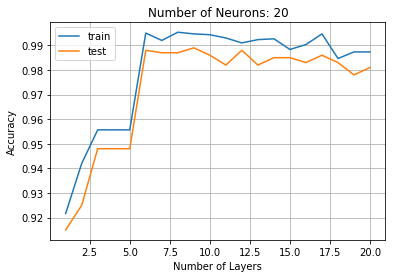

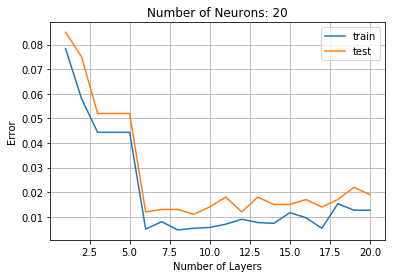

In [14]:
plt.figure()
plt.grid(True)
plt.plot(tx,train_accx[0,:])
plt.plot(tx,test_accx[0,:])
plt.legend(['train', 'test'])
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy')
plt.title('Number of Neurons: %2d' %num_of_neurons)

plt.figure()
plt.grid(True)
plt.plot(tx,1-train_accx[0,:])
plt.plot(tx,1-test_accx[0,:])
plt.legend(['train', 'test'])
plt.xlabel('Number of Layers')
plt.ylabel('Error')
plt.title('Number of Neurons: %2d' %num_of_neurons)